#Ocorrências na Aviação Brasileira - Análise de exploração de dados


A seguinte análise tem como objetivo extrair dados e entender o comportamento de ocorrências na aviação brasileira. A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2012 a 2021 que ocorreram em solo brasileiro. A base de está desenvolvida de maneira relacional, com as tabelas contendo:

<p>OCORRÊNCIA.csv - Informações sobre as ocorrências.
<p>OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
<p>AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
<p>FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
<p>RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.


Algumas das questões a serem resolvidas são: 


*   Quais a fase operação apresentaram maiores ocorreências;
*   Quais foram as fatalidades por fase operação;
*   Quais foram as fatalidades por fabricante; 
*   Quais foram as fatalidades por modelo; 



In [1]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

Importando bases de dado e contatenando conforme a coluna em comum número da ocorrência. As tabela estão correlacionadas entre si conforme o número de registro da ocorrência.

In [2]:
df_ocorrencia_main = pd.read_csv('ocorrencia.csv', sep=';', date_parser = True)
df_ocorrencia_tipo = pd.read_csv('ocorrencia_tipo.csv', sep=';', date_parser = True)
df_aeronave = pd.read_csv('aeronave.csv', sep=';', date_parser = True)
df_fator_contribuinte = pd.read_csv('fator_contribuinte.csv', sep=';', date_parser = True)
df_recomendacao = pd.read_csv('recomendacao.csv', sep=';', date_parser = True)

In [3]:
df_ocorrencia_main.drop(columns=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'], inplace=True)

In [4]:
df_ocorrencia_tipo.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia'}, inplace=True)
df_aeronave.rename(columns={'codigo_ocorrencia2': 'codigo_ocorrencia'}, inplace=True)
df_fator_contribuinte.rename(columns={'codigo_ocorrencia3': 'codigo_ocorrencia'}, inplace=True)
df_recomendacao.rename(columns={'codigo_ocorrencia4': 'codigo_ocorrencia'}, inplace=True)

In [5]:
df_merge = pd.merge(df_ocorrencia_main, df_aeronave, on="codigo_ocorrencia")
df_merge = pd.merge(df_merge, df_fator_contribuinte, on="codigo_ocorrencia")
df_merge = pd.merge(df_merge, df_ocorrencia_tipo, on="codigo_ocorrencia")
df_merge = pd.merge(df_merge, df_recomendacao, on="codigo_ocorrencia")

In [6]:
df_merge = pd.merge(df_merge, df_fator_contribuinte, on="codigo_ocorrencia")
df_merge

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,fator_nome_y,fator_aspecto_y,fator_condicionante_y,fator_area_y
0,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,...,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53492,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,BRASIL,****,06/12/2020,13:15:00,...,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,MEMÓRIA,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
53493,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,BRASIL,****,06/12/2020,13:15:00,...,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
53494,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,BRASIL,****,06/12/2020,13:15:00,...,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
53495,80073,ACIDENTE,-10.98472,-37.05166,ARACAJU,SE,BRASIL,****,06/05/2021,14:57:00,...,2021-11-19,NaN,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL


#Verificando a quantidade de valores nulos.

In [7]:
df_merge.isnull().sum()/df_merge.shape[0]*100

codigo_ocorrencia                   0.000000
ocorrencia_classificacao            0.000000
ocorrencia_latitude                 0.000000
ocorrencia_longitude                0.000000
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.000000
ocorrencia_pais                     0.000000
ocorrencia_aerodromo                0.000000
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.000000
investigacao_aeronave_liberada     15.370955
investigacao_status                 0.000000
divulgacao_relatorio_numero         0.140195
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao           0.000000
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
aeronave_matricula                  0.000000
aeronave_operador_categoria         0.000000
aeronave_tipo_veiculo               0.000000
aeronave_fabricante                 0.000000
aeronave_m

Removendo algumas colunas que possuem muitos valores nulo como investigacao_aeronave_liberada e recomendacao_dia_feedback.

Como há valores poucos valores faltantes em algumas colunas com valores inferiores 1%, torna-se necessário uma avaliação indívidual em cada uma da variáveis. 

In [8]:
df_merge.drop(['recomendacao_dia_feedback','investigacao_aeronave_liberada'],axis=1, inplace=True)

In [9]:
df_merge['aeronave_assentos'].value_counts(normalize=True).reset_index()

,index,aeronave_assentos
0,6.0,0.133362
1,1.0,0.108654
2,7.0,0.103134
3,4.0,0.102007
4,2.0,0.087813
5,14.0,0.064362
6,10.0,0.053304
7,0.0,0.050412
8,9.0,0.043935
9,8.0,0.040686


In [10]:
df_merge['divulgacao_relatorio_numero'].value_counts(normalize=True).reset_index()

,index,divulgacao_relatorio_numero
0,A-134/CENIPA/2014,0.062296
1,IG-065/CENIPA/2018,0.056943
2,A-092/CENIPA/2015,0.043278
3,A-526/CENIPA/2015,0.028471
4,A-128/CENIPA/2015,0.025270
...,...,...
550,A-002/CENIPA/2020,0.000019
551,IG-099/CENIPA/2016,0.000019
552,IG-191/CENIPA/2018,0.000019
553,A-161/CENIPA/2015,0.000019


In [11]:
df_merge['aeronave_ano_fabricacao'].value_counts(normalize=True).reset_index()

,index,aeronave_ano_fabricacao
0,2010.0,0.103679
1,2013.0,0.050779
2,2001.0,0.047813
3,0.0,0.047813
4,1983.0,0.042538
...,...,...
62,1969.0,0.000375
63,1965.0,0.000300
64,1945.0,0.000075
65,1948.0,0.000038


In [12]:
df_merge['recomendacao_conteudo'].value_counts(normalize=True).reset_index()

,index,recomendacao_conteudo
0,AVALIAR A VIABILIDADE DA IMPLANTAçãO DE UM RAD...,0.006318
1,ANALISAR A PERTINêNCIA DE SE ESTABELECER UM MO...,0.006318
2,ALERTAR OS CONTROLADORES DE TRáFEGO AéREO BRAS...,0.006318
3,ALERTAR OS CONTROLADORES DE TRáFEGO AéREO BRAS...,0.006318
4,"ANALISAR A PERTINêNCIA DE SE ESTABELECER, COM ...",0.006318
...,...,...
1112,Atuar junto à empresa Serviços Aéreos Flylog L...,0.000019
1113,Assegurar-se de que as oficinas de manutenção ...,0.000019
1114,Divulgar o presente relatório às oficinas que ...,0.000019
1115,Efetuar gestões de forma que fique assegurado ...,0.000019


In [39]:
df_merge.drop_duplicates().sum()

KeyboardInterrupt: ignored

Uma possibilidade é subsituir os valores faltantes pelo valor que mais se repete, porém como uma as variáveis são especifícas e apresentam valores caracteristicos de cada opta-se por deletar os valores as linhas faltantes. Além disso, como há poucos valores ausentes, os resultados finais serão ligeiramente afetados. 

In [13]:
#df_merge.drop(['aeronave_assentos','divulgacao_relatorio_numero','aeronave_ano_fabricacao', 'recomendacao_conteudo'],axis=1, inplace=True)
df_merge.dropna(inplace=True)

#Tratando dados

<li>Latitue e Longitude

In [14]:
#verificando os valores unicos
for i in df_merge.columns:
    ##print(f'\nColuna: {i}, {df_merge[i].unique()}')
    print(df_merge[i].value_counts(normalize=True).reset_index())

     index  codigo_ocorrencia
0    52265           0.062575
1    77803           0.057198
2    53340           0.043472
3    46583           0.028599
4    53488           0.025384
..     ...                ...
544  65414           0.000019
545  60732           0.000019
546  78383           0.000019
547  53545           0.000019
548  60692           0.000019

[549 rows x 2 columns]
             index  ocorrencia_classificacao
0         ACIDENTE                  0.753027
1  INCIDENTE GRAVE                  0.218618
2        INCIDENTE                  0.028354
                index  ocorrencia_latitude
0      -23.9597222222             0.062575
1     -158.711.111.11             0.057198
2             -3.7325             0.043472
3    \t-25.25833333\t             0.028599
4      -11.8961111111             0.025384
..                ...                  ...
503     -2.6758333333             0.000019
504   -65.291.666.667             0.000019
505  \t-27.67055556\t             0.000019
506   

Visto que nos valores para latitude e longitude há divergências como \t, torna-se necessário a sua remoção.

In [15]:
df_merge['ocorrencia_latitude'] = df_merge['ocorrencia_latitude'].str.replace(r'\\t',' ')
df_merge['ocorrencia_longitude'] = df_merge['ocorrencia_longitude'].str.replace(r'\\t',' ')

In [16]:
#verificando valores
#df_merge['ocorrencia_latitude'].value_counts(normalize=True)[:50]
df_merge.groupby('ocorrencia_longitude').ocorrencia_latitude.count().sort_values(ascending=False)[:50]

ocorrencia_longitude
-46.3269444444     3328
-479.186.111.11    3042
-38.7119444444     2312
 -49.32805556      1521
-44.2944444444     1350
-42.8244444444     1018
-479.161.111.11    1014
-600.625            900
-46.4730555556      786
-37.36416667        784
-488.327.777.77     768
-47.9208333333      754
***                 747
-47.9744444444      726
-43.2505555556      720
-47.6919444444      700
-46.577778          675
-54.7241666667      605
-34.92277778        600
-46.28              588
-46.0533333333      576
-49.2208333333      576
-668.975            512
-52.6436111111      507
-47.577382          500
-559.983.333.33     484
-39.0333333333      484
 -50.26166667       484
-63.653333333       448
-48.3566666667      441
-60.09219310931     400
-38.94000           400
-53.465000          400
-65.5269444444      392
-50.4133333333      392
-49.5527777778      363
 -50.01583333       363
-48.4938888889      363
-54.8086111111      343
-46.9302777778      338
 -57.26611111      




Há alguns valores que possuem mais de um ponto como por exemplo 454545.5454.54.55. Portanto é necessário removelos e normalizalos com somente um ponto.

In [17]:
def deleting_dots(num): 
  aux1 = num.split('.')
  if len(aux1) > 1:
    aux2 = aux1[0] + '.' + aux1[1]
    aux3 = ''.join(aux1[2:])
    return(aux2 + aux3)
  else:
    aux4 = '123456'
    aux4[:2] + '.' + aux4[2:]
    return(aux4)

In [18]:
df_merge['ocorrencia_latitude'] = df_merge['ocorrencia_latitude'].apply(lambda x: deleting_dots(x))
df_merge['ocorrencia_longitude'] = df_merge['ocorrencia_longitude'].apply(lambda x: deleting_dots(x))

Removendo ** nos valores

In [19]:
df_merge = df_merge[df_merge['ocorrencia_latitude']!='***']
df_merge = df_merge[df_merge['ocorrencia_longitude']!='***']

Disturbio nos dados em latitude

In [20]:
df_merge['ocorrencia_latitude'] = df_merge['ocorrencia_latitude'].str.replace(r'\°',' ')

In [21]:
df_merge.ocorrencia_latitude.astype(float)

0       -23.435556
1       -23.435556
2       -23.435556
3       -23.435556
4       -23.435556
           ...    
53492   -33.176944
53493   -33.176944
53494   -33.176944
53495   -10.984720
53496   -10.984720
Name: ocorrencia_latitude, Length: 53184, dtype: float64

In [22]:
df_merge['ocorrencia_latitude'], df_merge['ocorrencia_longitude']

(0        -23.4355555556
 1        -23.4355555556
 2        -23.4355555556
 3        -23.4355555556
 4        -23.4355555556
               ...      
 53492       -33.176944 
 53493       -33.176944 
 53494       -33.176944 
 53495         -10.98472
 53496         -10.98472
 Name: ocorrencia_latitude, Length: 53184, dtype: object,
 0        -46.4730555556
 1        -46.4730555556
 2        -46.4730555556
 3        -46.4730555556
 4        -46.4730555556
               ...      
 53492       -53.014167 
 53493       -53.014167 
 53494       -53.014167 
 53495         -37.05166
 53496         -37.05166
 Name: ocorrencia_longitude, Length: 53184, dtype: object)

In [23]:
df_merge.columns

Index(['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf',
       'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia',
       'ocorrencia_hora', 'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeron

In [24]:
len(df_merge.ocorrencia_uf.unique())

27

Gráfico de ocorrências por estado

In [25]:
df_merge.groupby("ocorrencia_uf").ocorrencia_uf.count()

ocorrencia_uf
AC       88
AL     1498
AM     3999
AP      338
BA     2035
CE     2894
DF     5080
ES      155
GO     3242
MA     1649
MG      964
MS      657
MT     2275
PA     3995
PB       98
PE     1321
PI     1182
PR     3324
RJ     2455
RN        2
RO      272
RR      276
RS     3415
SC      720
SE      790
SP    10435
TO       25
Name: ocorrencia_uf, dtype: int64

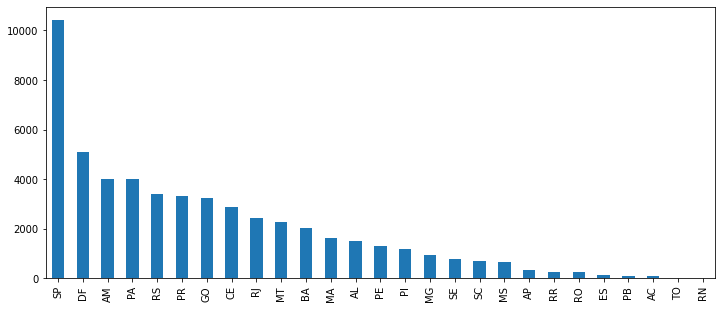

In [26]:
plt.figure(figsize=(12,5))
df_merge.ocorrencia_uf.value_counts().plot.bar()

Nota-se que a maior quantidade de ocorrências áreas ocorre no estado de São Paulo sendo o mais populoso e desenvolvido do país. Alguns estados com menos infraestrutura e região de floresta como Para e Amazonas apresentam uma quantidade significativa de acidentes.

Para verificar a fatalidade por fase operação, é necessário entende onde há mais ocorrencias. Com o agrupamento das categorias, tem-se os resultados:

In [27]:
df_merge['aeronave_fase_operacao'].value_counts()

DECOLAGEM                          9809
POUSO                              7369
CRUZEIRO                           6154
CORRIDA APÓS POUSO                 4503
CIRCUITO DE TRÁFEGO                4448
APROXIMAÇÃO FINAL                  4407
PAIRADO                            3048
MANOBRA                            2588
DESCIDA                            1949
ARREMETIDA NO AR                   1692
ESPECIALIZADA                      1276
SUBIDA                             1272
TÁXI                                989
ESTACIONAMENTO                      985
OUTRA FASE                          874
VOO A BAIXA ALTURA                  651
INDETERMINADA                       646
OPERAÇÃO DE SOLO                    179
DECOLAGEM VERTICAL                  177
ARREMETIDA NO SOLO                  149
RETA FINAL                           11
PARTIDA DO MOTOR                      4
PROCEDIMENTO DE APROXIMAÇÃO IFR       4
Name: aeronave_fase_operacao, dtype: int64

O maior indice de problemas aéreos encontra-se no período da decolagem, seguido pelo pouso e logo cruzeiro. Para cada uma dessas, avali-a se a quantidade de fatalidades.

In [28]:
list_fase_operacao = df_merge['aeronave_fase_operacao'].unique()
aux2 = []
for l in list_fase_operacao:
  aux2.append(df_merge.loc[(df_merge['aeronave_fase_operacao'] == l) & (df_merge['aeronave_fatalidades_total'] > 0)].aeronave_fatalidades_total.sum())


In [29]:
df_h1 = pd.DataFrame (list_fase_operacao, columns = ['aeronave_fase_operacao'])
df_h2 = pd.DataFrame (aux2, columns = ['aeronave_fatalidades_total'])
df_mortes_operacao = pd.concat([df_h1, df_h2], axis=1)

In [30]:
df_mortes_operacao.sort_values(by='aeronave_fatalidades_total', ascending=False)

,aeronave_fase_operacao,aeronave_fatalidades_total
1,CIRCUITO DE TRÁFEGO,29196
2,DECOLAGEM,12093
4,CRUZEIRO,9601
6,APROXIMAÇÃO FINAL,7832
12,ARREMETIDA NO AR,5758
11,MANOBRA,4649
0,DESCIDA,2582
8,POUSO,2088
9,VOO A BAIXA ALTURA,1669
5,INDETERMINADA,1192


Como visto, por mais que o maior índice de acidentes aeronáuticos seja durante a decolagem, a maior quantidade de fatalidades ocorre quando a arenove está no processo de circuito de trafégo e logo seguido por decolagem. Ou seja, os momentos em que uma aeronave encontra-se próxima do pouso ou da decolagem, são os instantes mais sensíveis que apresentam maiores fatalidade. Como pode ser visto na imagem abaixo.

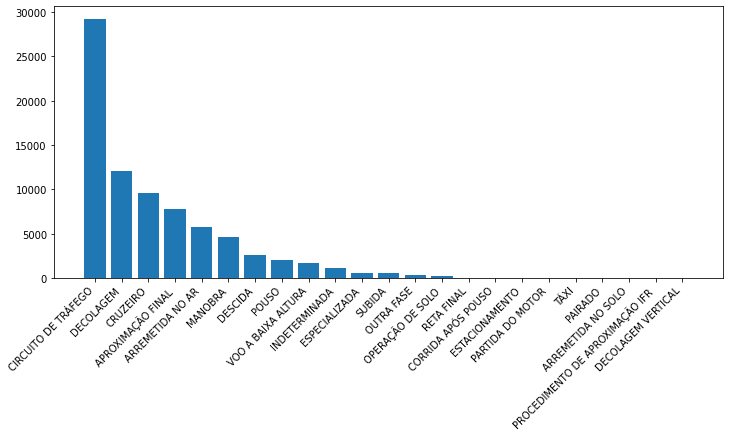

In [31]:
plt.figure(figsize = (12,5))
plt.bar(df_mortes_operacao.sort_values(by='aeronave_fatalidades_total', ascending=False).aeronave_fase_operacao,df_mortes_operacao.sort_values(by='aeronave_fatalidades_total', ascending=False).aeronave_fatalidades_total)
plt.xticks(rotation=45, ha='right');

Um segundo ponto avaliado é o tipo de aeronave e fabricante que mais apresentaram mortes. 

In [32]:
df_merge.groupby('aeronave_fabricante').aeronave_fabricante.count().sort_values(ascending=False)

aeronave_fabricante
CESSNA AIRCRAFT                        12630
NEIVA INDUSTRIA AERONAUTICA             4776
EMBRAER                                 3943
PIPER AIRCRAFT                          3905
BELL HELICOPTER                         3816
BOEING COMPANY                          3500
EUROCOPTER FRANCE                       2595
AIRBUS INDUSTRIE                        2520
EUROCOPTER DEUTSCHLAND                  2409
BEECH AIRCRAFT                          1903
HELIBRAS                                1779
AERO BOERO                              1654
AIR TRACTOR                             1409
AEROSPATIALE AND ALENIA                 1394
ROBINSON HELICOPTER                     1321
INDÚSTRIA PARANAENSE DE ESTRUTURAS       628
BRITTEN-NORMAN                           528
MIL HELICOPTER                           524
EDRA INDUSTRIA AERONAUTICA LTDA          220
AGUSTA                                   200
RAYTHEON AIRCRAFT                        197
HAWKER BEECHCRAFT                  

In [33]:
df_merge.groupby('aeronave_modelo').aeronave_modelo.count().sort_values(ascending=False)

aeronave_modelo
560XLS+      3328
737-8EH      2334
BK117 C-2    2312
PA-31T2      1537
AS 350 B2    1533
             ... 
M35             1
PZL-SW4         1
402B            1
B90             1
210R            1
Name: aeronave_modelo, Length: 202, dtype: int64

In [34]:
list_aeronave_fabricante = df_merge['aeronave_fabricante'].unique()
list_aeronave_modelo = df_merge['aeronave_modelo'].unique()

aux3 = []
aux4 = []

for l in list_aeronave_fabricante:
  aux3.append(df_merge.loc[(df_merge['aeronave_fabricante'] == l)].aeronave_fatalidades_total.sum())

for i in list_aeronave_modelo:
  aux4.append(df_merge.loc[(df_merge['aeronave_modelo'] == i)].aeronave_fatalidades_total.sum())

In [35]:
df_h3 = pd.DataFrame(list_aeronave_fabricante, columns = ['aeronave_fabricante'])
df_h4 = pd.DataFrame(aux3, columns = ['mortes_fabricante'])
df_mortes_fabricante = pd.concat([df_h3, df_h4], axis=1)

df_h5 = pd.DataFrame (list_aeronave_modelo, columns = ['aeronave_modelo'])
df_h6 = pd.DataFrame (aux4, columns = ['mortes_modelo'])
df_mortes_modelo = pd.concat([df_h5, df_h6], axis=1)

df_mortes_fabricante.sort_values(by='mortes_fabricante', ascending=False)

,aeronave_fabricante,mortes_fabricante
10,CESSNA AIRCRAFT,35021
18,BELL HELICOPTER,7868
9,PIPER AIRCRAFT,7800
1,NEIVA INDUSTRIA AERONAUTICA,5606
13,EMBRAER,5323
8,BEECH AIRCRAFT,4289
2,ROBINSON HELICOPTER,2153
25,BRITTEN-NORMAN,2000
20,HELIBRAS,1932
14,AGUSTA,1600


In [36]:
df_mortes_modelo.sort_values(by='mortes_modelo', ascending=False)

,aeronave_modelo,mortes_modelo
107,560XLS+,23296
57,PA-31T2,6084
100,206L-3,5400
69,EMB-820C CARAJA,5070
91,172A,4056
...,...,...
96,SR22,0
97,A320-232,0
98,EMB-720C,0
99,A320-214,0


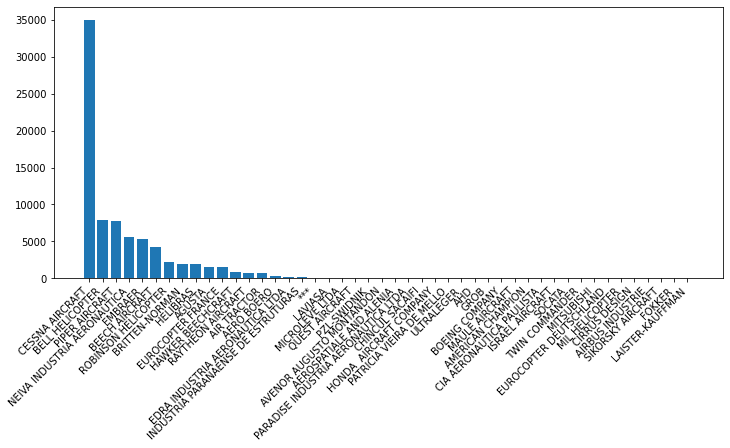

In [37]:
plt.figure(figsize = (12,5))
plt.bar(df_mortes_fabricante.sort_values(by='mortes_fabricante', ascending=False).aeronave_fabricante, df_mortes_fabricante.sort_values(by='mortes_fabricante', ascending=False).mortes_fabricante)
plt.xticks(rotation=45, ha='right');

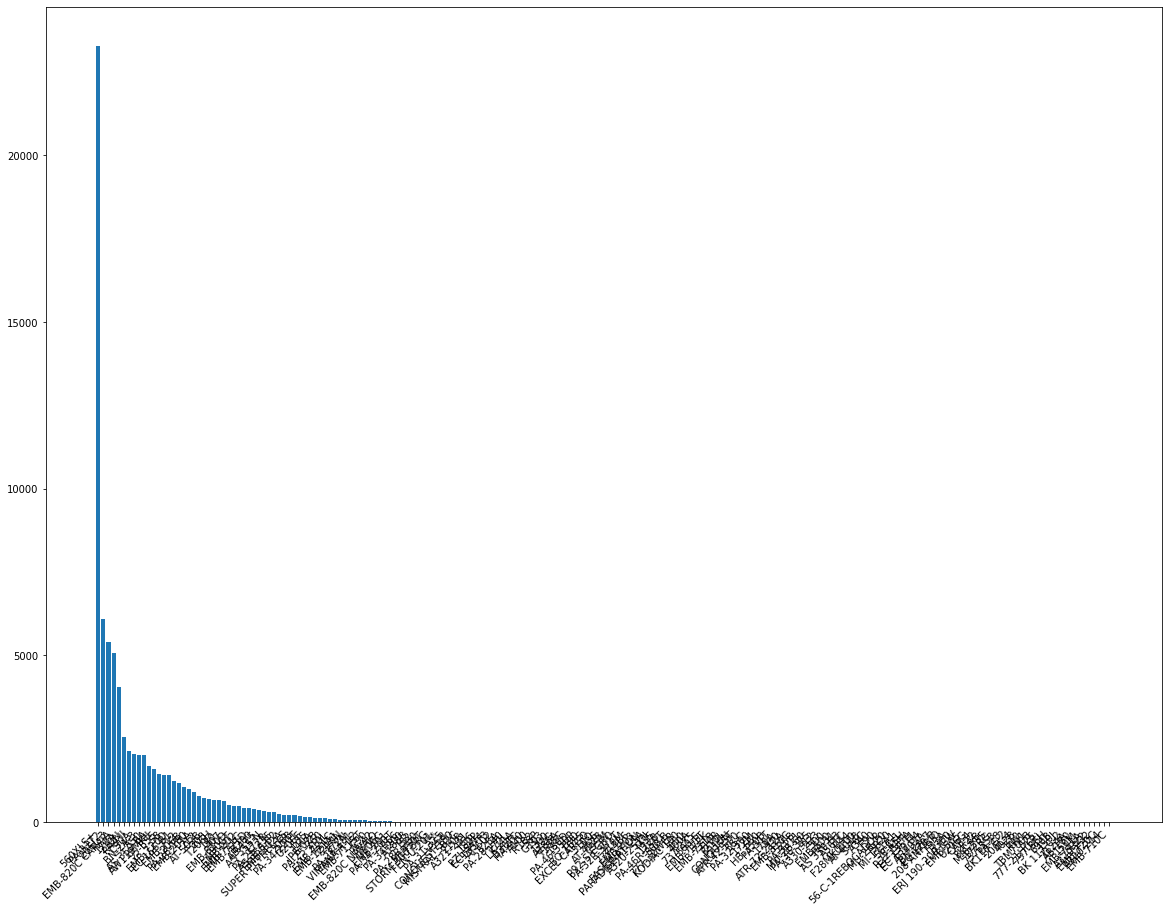

In [38]:
plt.figure(figsize = (20,15))
plt.bar(df_mortes_modelo.sort_values(by='mortes_modelo', ascending=False).aeronave_modelo, df_mortes_modelo.sort_values(by='mortes_modelo', ascending=False).mortes_modelo)
plt.xticks(rotation=45, ha='right');

A fabricante que apresenta mais fatalidades é a CESSNA AIRCRAFT, enquanto o modelo de aeronave é o 560XLS+, o qual pertecende a fabricante citada anteriormente. 

In [39]:
df_mortes_fabricante[df_mortes_fabricante.aeronave_fabricante.isin(['AIRBUS INDUSTRIE', 'EMBRAER', 'BOEING COMPANY', 'AEROSPATIALE AND ALENIA'])]

,aeronave_fabricante,mortes_fabricante
0,AEROSPATIALE AND ALENIA,0
7,AIRBUS INDUSTRIE,0
13,EMBRAER,5323
23,BOEING COMPANY,0


In [40]:
aux6 = df_merge.groupby('aeronave_fabricante').count().codigo_ocorrencia.reset_index()

In [41]:
aux6[aux6.aeronave_fabricante.isin(['AIRBUS INDUSTRIE', 'EMBRAER', 'BOEING COMPANY', 'AEROSPATIALE AND ALENIA'])]

,aeronave_fabricante,codigo_ocorrencia
2,AEROSPATIALE AND ALENIA,1394
6,AIRBUS INDUSTRIE,2520
11,BOEING COMPANY,3500
18,EMBRAER,3943


Analisando as fabricantes que possuem aviões voando em linhas comercias no Brasil, percebe-se que o maior número de ocorrências são com aviões embraear. Possilvemente esse valor se dá pois a fabricante brasileiras tem mais modelos voando em território nacional. Enquanto o número de fatalidade também encontra-se nessas arenaves. 
Um segundo ponto importante é que os dados dispotos na base de dados são de ocorrências á partir do ano de 2012, descartando assim acidentes com fatalidades das fabricantes Airbus e Boieng que ocorrem no passado.

In [42]:
df_merge.T

,0,1,2,3,4,5,6,7,8,9,...,53487,53488,53489,53490,53491,53492,53493,53494,53495,53496
codigo_ocorrencia,45331,45331,45331,45331,45331,45331,45331,45331,45331,45331,...,79713,79713,79713,79713,79713,79713,79713,79713,80073,80073
ocorrencia_classificacao,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,...,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE,ACIDENTE
ocorrencia_latitude,-23.4355555556,-23.4355555556,-23.4355555556,-23.4355555556,-23.4355555556,-23.4355555556,-23.4355555556,-23.4355555556,-23.4355555556,-23.4355555556,...,-33.176944,-33.176944,-33.176944,-33.176944,-33.176944,-33.176944,-33.176944,-33.176944,-10.98472,-10.98472
ocorrencia_longitude,-46.4730555556,-46.4730555556,-46.4730555556,-46.4730555556,-46.4730555556,-46.4730555556,-46.4730555556,-46.4730555556,-46.4730555556,-46.4730555556,...,-53.014167,-53.014167,-53.014167,-53.014167,-53.014167,-53.014167,-53.014167,-53.014167,-37.05166,-37.05166
ocorrencia_cidade,GUARULHOS,GUARULHOS,GUARULHOS,GUARULHOS,GUARULHOS,GUARULHOS,GUARULHOS,GUARULHOS,GUARULHOS,GUARULHOS,...,SANTA VITÓRIA DO PALMAR,SANTA VITÓRIA DO PALMAR,SANTA VITÓRIA DO PALMAR,SANTA VITÓRIA DO PALMAR,SANTA VITÓRIA DO PALMAR,SANTA VITÓRIA DO PALMAR,SANTA VITÓRIA DO PALMAR,SANTA VITÓRIA DO PALMAR,ARACAJU,ARACAJU
ocorrencia_uf,SP,SP,SP,SP,SP,SP,SP,SP,SP,SP,...,RS,RS,RS,RS,RS,RS,RS,RS,SE,SE
ocorrencia_pais,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,...,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL,BRASIL
ocorrencia_aerodromo,SBGR,SBGR,SBGR,SBGR,SBGR,SBGR,SBGR,SBGR,SBGR,SBGR,...,****,****,****,****,****,****,****,****,****,****
ocorrencia_dia,06/01/2012,06/01/2012,06/01/2012,06/01/2012,06/01/2012,06/01/2012,06/01/2012,06/01/2012,06/01/2012,06/01/2012,...,06/12/2020,06/12/2020,06/12/2020,06/12/2020,06/12/2020,06/12/2020,06/12/2020,06/12/2020,06/05/2021,06/05/2021
ocorrencia_hora,13:44:00,13:44:00,13:44:00,13:44:00,13:44:00,13:44:00,13:44:00,13:44:00,13:44:00,13:44:00,...,13:15:00,13:15:00,13:15:00,13:15:00,13:15:00,13:15:00,13:15:00,13:15:00,14:57:00,14:57:00
